#### Pre-processing
Now that we have created a dataset to work with, some pre-processing is needed for our recommender.

3 Pre-processing steps are needed: <br>
1. Constructing the User-By-Game matrix, with playtimes inserted.
2. Apply scaling to address playtime skewness.
3. Prepare sparse matrix.

In [1]:
# Import Libraries
# Packages for work.
import pandas as pd
import numpy as np

# Visual packages.
import matplotlib.pyplot as plt
%matplotlib inline
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['font.size'] = 12
import plotly.express as px
import seaborn as sns

In [2]:
# Reading in the dataset.
dataset_df = pd.read_excel("dataset_trimmed.xlsx")
dataset_df["steamid"] = dataset_df["steamid"].astype(str)
dataset_df["appid"] = dataset_df["appid"].astype(str)
dataset_df

,appid,game name,hours played,steamid
0,400,Portal,6.116667,76561198010430483
1,13640,Tom Clancy's Ghost Recon: Advanced Warfighter,0.366667,76561198010430483
2,15300,Tom Clancy's Ghost Recon,0.600000,76561198010430483
3,17300,Crysis,13.800000,76561198010430483
4,17330,Crysis Warhead,0.016667,76561198010430483
...,...,...,...,...
3177,1620690,Rubber Bandits: Summer Prologue,0.850000,76561198092753159
3178,461040,PICO PARK:Classic Edition,0.016667,76561198092753159
3179,1942280,Brotato,86.100000,76561198092753159
3180,1948280,Stacklands,13.683333,76561198092753159


#### 1. Constructing the user-by-game matrix. <br>
Constructing the user-by-game matrix is simply re-organizing the dataset to a table form. <br>

In [4]:
# Create empty user-by-game matrix.
# Steam IDs as index, game names as column headers.
ubg_matrix = pd.DataFrame(index=dataset_df["steamid"].unique(),columns=dataset_df["game name"].unique())
ubg_matrix

,Portal,Tom Clancy's Ghost Recon: Advanced Warfighter,Tom Clancy's Ghost Recon,Crysis,Crysis Warhead,Left 4 Dead 2,Torchlight,Devil May Cry 4,Batman: Arkham Asylum GOTY Edition,Battlefield: Bad Company™ 2,...,HomeWork Is Crazy / 作业疯了,Chinatris,Trine 4: The Nightmare Prince,A Way Out,Battlefield 1 ™,Kingdom Rush Vengeance,雀魂麻将(MahjongSoul),Draw & Guess,Rubber Bandits: Summer Prologue,Stacklands
76561198010430483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198039495811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198040564894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197994644797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198064970505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198004670799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197971034129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197962050254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198001262177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198084453258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Input the hours played into the matrix.
for each_row in range(len(dataset_df)): # For each row in the dataset,
  steam_id = dataset_df.iloc[each_row]['steamid'] # take the Steam ID of that row,
  game_name = dataset_df.iloc[each_row]['game name'] # and the game name of that row,
  ubg_matrix.loc[steam_id,game_name] = dataset_df.iloc[each_row]['hours played'] # and input the playtime of that row into the table with the corresponding Steam ID and game name.

In [10]:
# Taking a look at the user-by-game matrix with playtime.
ubg_matrix

,Portal,Tom Clancy's Ghost Recon: Advanced Warfighter,Tom Clancy's Ghost Recon,Crysis,Crysis Warhead,Left 4 Dead 2,Torchlight,Devil May Cry 4,Batman: Arkham Asylum GOTY Edition,Battlefield: Bad Company™ 2,...,HomeWork Is Crazy / 作业疯了,Chinatris,Trine 4: The Nightmare Prince,A Way Out,Battlefield 1 ™,Kingdom Rush Vengeance,雀魂麻将(MahjongSoul),Draw & Guess,Rubber Bandits: Summer Prologue,Stacklands
76561198010430483,6.116667,0.366667,0.6,13.8,0.016667,116.516667,13.7,11.116667,13.0,69.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198039495811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198040564894,NaN,NaN,NaN,NaN,NaN,35.483333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197994644797,12.416667,NaN,NaN,NaN,NaN,471.133333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198064970505,NaN,NaN,NaN,NaN,NaN,181.483333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198004670799,NaN,NaN,NaN,NaN,NaN,39.933333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197971034129,NaN,NaN,NaN,NaN,NaN,211.133333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197962050254,NaN,NaN,NaN,NaN,NaN,19.616667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198001262177,9.333333,NaN,NaN,NaN,NaN,280.65,12.283333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198084453258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checkpoint 1<br>
Save the user-by-game matrix to csv. <br>

In [11]:
ubg_matrix.to_csv('ubg_matrix.csv', index=True)

In [14]:
# Use this code to read the csv file after Checkpoint 1. Not necessary if you are running the code from the beginning.
ubg_matrix = pd.read_csv('ubg_matrix.csv', index_col=0)
ubg_matrix.head(10)

,Portal,Tom Clancy's Ghost Recon: Advanced Warfighter,Tom Clancy's Ghost Recon,Crysis,Crysis Warhead,Left 4 Dead 2,Torchlight,Devil May Cry 4,Batman: Arkham Asylum GOTY Edition,Battlefield: Bad Company™ 2,...,HomeWork Is Crazy / 作业疯了,Chinatris,Trine 4: The Nightmare Prince,A Way Out,Battlefield 1 ™,Kingdom Rush Vengeance,雀魂麻将(MahjongSoul),Draw & Guess,Rubber Bandits: Summer Prologue,Stacklands
76561198010430483,6.116667,0.366667,0.6,13.8,0.016667,116.516667,13.700000,11.116667,13.0,69.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198039495811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198040564894,NaN,NaN,NaN,NaN,NaN,35.483333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197994644797,12.416667,NaN,NaN,NaN,NaN,471.133333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198064970505,NaN,NaN,NaN,NaN,NaN,181.483333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198004670799,NaN,NaN,NaN,NaN,NaN,39.933333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197971034129,NaN,NaN,NaN,NaN,NaN,211.133333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197962050254,NaN,NaN,NaN,NaN,NaN,19.616667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198001262177,9.333333,NaN,NaN,NaN,NaN,280.650000,12.283333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198084453258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Applying scaling onto the user-by-game matrix.

Next, check on the spread of hours played of games, across all users. <br>
Histogram view for hours played of games. <br>

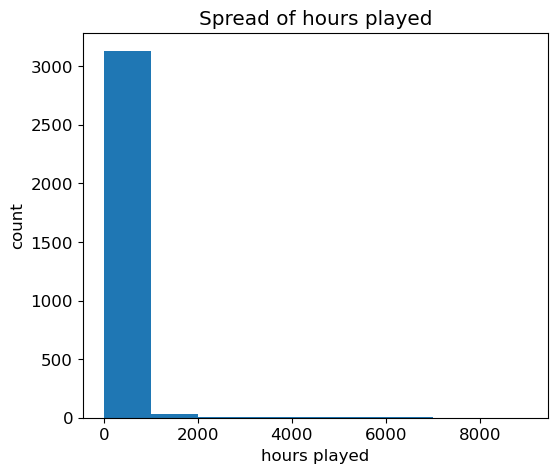

In [16]:
plt.hist(ubg_matrix.values.flatten(), bins=range(0,10000,1000))
plt.xlabel('hours played')
plt.ylabel('count')
plt.title('Spread of hours played')
plt.show()

Based on the histogram above, the data is highly skewed. Across all users and the games they have played, almost all the games have a playtime of 1000 hours or less. <br>

We can apply logarithmic transformation to the data in order to normalize or scale the playtimes. If the playtimes are not normalized or scaled, some user playtimes may have a much higher influence on the recommendations than others, which can lead to biased recommendations.

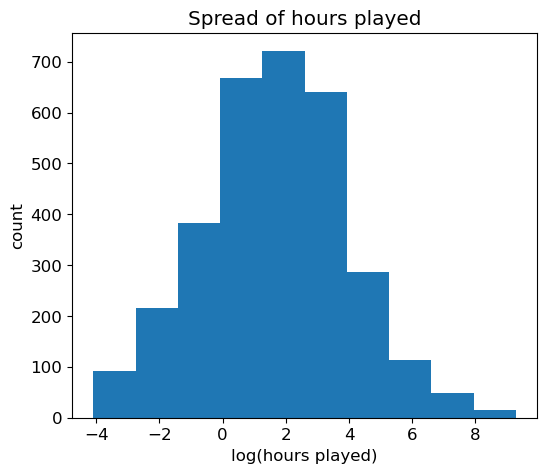

In [18]:
# Apply log to the values in userbygame_df
ubg_log_vis = np.log(ubg_matrix.values.flatten())

# Plot histogram of the logged values
plt.hist(ubg_log_vis, bins=10)
plt.xlabel('log(hours played)')
plt.ylabel('count')
plt.title('Spread of hours played')
plt.show()

After applying log, the playtimes are smoothened out, and scale better. It resembles a normal distribution. <br>

Let's apply log to our user-by-game matrix.

In [21]:
# Log transform the user by game matrix (table)
# This normalizes / scales the playtimes.
ubg_logged = np.log(ubg_matrix)
ubg_logged

,Portal,Tom Clancy's Ghost Recon: Advanced Warfighter,Tom Clancy's Ghost Recon,Crysis,Crysis Warhead,Left 4 Dead 2,Torchlight,Devil May Cry 4,Batman: Arkham Asylum GOTY Edition,Battlefield: Bad Company™ 2,...,HomeWork Is Crazy / 作业疯了,Chinatris,Trine 4: The Nightmare Prince,A Way Out,Battlefield 1 ™,Kingdom Rush Vengeance,雀魂麻将(MahjongSoul),Draw & Guess,Rubber Bandits: Summer Prologue,Stacklands
76561198010430483,1.811017,-1.003302,-0.510826,2.624669,-4.094345,4.758034,2.617396,2.408445,2.564949,4.235072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198039495811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198040564894,NaN,NaN,NaN,NaN,NaN,3.569063,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197994644797,2.519040,NaN,NaN,NaN,NaN,6.155141,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198064970505,NaN,NaN,NaN,NaN,NaN,5.201164,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198004670799,NaN,NaN,NaN,NaN,NaN,3.687211,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197971034129,NaN,NaN,NaN,NaN,NaN,5.352490,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197962050254,NaN,NaN,NaN,NaN,NaN,2.976380,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198001262177,2.233592,NaN,NaN,NaN,NaN,5.637108,2.508243,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198084453258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Noted from the visual and the table that after applying log, the scale contains negative values (range starting from negative values). <br>
One way to turn the logarithmic scale positive is to shift the scale by adding a constant value to all the values. <br>
This constant value should be the positive value (or absolute value) of the smallest negative value (minimum) in the current scale. <br>
<p>
It should be noted that this method to shift the scale by adding a constant value usually has implications on the use and final interpretation of the data. <br>
Adding a constant value can result in a nonlinear transformation of the data, which can affect the relationships between variables. <br>
However, in this case, we are only using 1 variable, playtime. Also, playtime is a continuous variable measured in hours, and this measurement is uniform across all users and games. <br>

In [22]:
print(ubg_logged.min().min())
# The minimum value of the log scale is -4.094344562222105. We need to add the absolute of this value to the entire table to make the minimum value 0.
print(ubg_logged.max().max())
# Just checking the maximum value of the log scale. It is 9.288593787513182.

-4.094344562222105
9.28859686994195


In [25]:
# Adding the absolute of the minimum value to the entire table.
ubg_logged += abs(ubg_logged.min().min())
print(ubg_logged.min().min())
print(ubg_logged.max().max())

0.0
13.382941432164055


In [24]:
ubg_logged

,Portal,Tom Clancy's Ghost Recon: Advanced Warfighter,Tom Clancy's Ghost Recon,Crysis,Crysis Warhead,Left 4 Dead 2,Torchlight,Devil May Cry 4,Batman: Arkham Asylum GOTY Edition,Battlefield: Bad Company™ 2,...,HomeWork Is Crazy / 作业疯了,Chinatris,Trine 4: The Nightmare Prince,A Way Out,Battlefield 1 ™,Kingdom Rush Vengeance,雀魂麻将(MahjongSoul),Draw & Guess,Rubber Bandits: Summer Prologue,Stacklands
76561198010430483,5.905362,3.091042,3.583519,6.719013,0.0,8.852379,6.711740,6.50279,6.659294,8.329417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198039495811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198040564894,NaN,NaN,NaN,NaN,NaN,7.663408,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197994644797,6.613384,NaN,NaN,NaN,NaN,10.249486,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198064970505,NaN,NaN,NaN,NaN,NaN,9.295508,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198004670799,NaN,NaN,NaN,NaN,NaN,7.781556,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197971034129,NaN,NaN,NaN,NaN,NaN,9.446834,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197962050254,NaN,NaN,NaN,NaN,NaN,7.070724,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198001262177,6.327937,NaN,NaN,NaN,NaN,9.731453,6.602588,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561198084453258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


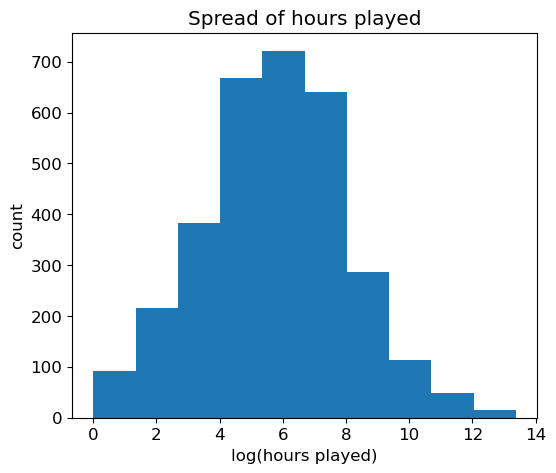

In [26]:
# Plot histogram of the new scale of values.
plt.hist(ubg_logged.values.flatten(), bins=10)
plt.xlabel('log(hours played)')
plt.ylabel('count')
plt.title('Spread of hours played')
plt.show()

Checkpoint 2 <br>
Save the normalized user-by-game matrix to csv. <br>

In [27]:
ubg_logged.to_csv('ubg_logged.csv', index=True)

The 3rd step of the pre-processing will be continued in the recommender notebooks. <br>
It is closely related to the construction of the recommender functions. <br>